In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import mglearn
import math

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
# plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
# memory management
import gc

In [2]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [28]:
data = pd.read_csv("dataset2.csv")
data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,0.0,26.0
1,1,7,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,0.0,25.0
2,1,9,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,0.0,28.0
3,1,11,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,0.0,26.0
4,1,11,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180115,1,13,165,65,84.0,0.9,1.2,1.0,1.0,160.0,...,15.2,1.0,1.0,34.0,12.0,78.0,1.0,1.0,0.0,24.0
1180116,1,8,180,65,77.0,1.2,1.2,1.0,1.0,123.0,...,15.9,1.0,1.0,11.0,8.0,15.0,3.0,1.0,0.0,20.0
1180117,2,14,155,55,83.0,0.2,0.6,1.0,1.0,146.0,...,12.4,1.0,0.7,21.0,15.0,23.0,1.0,0.0,0.0,23.0
1180118,2,14,155,55,84.0,0.9,1.2,1.0,1.0,130.0,...,12.9,1.0,0.8,29.0,14.0,19.0,1.0,0.0,0.0,23.0


In [29]:
data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

In [30]:
def plot_model(model):
    n_features = len(X.columns)
    feature_names = X.columns
    plt.figure(figsize = (10,8))
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

허연감 필수
(트리글리세라이드, LDL콜레스테롤, 수축기혈압, 이완기혈압, 혈청지오티, BMI) 1~2개 선택

In [31]:
X = data[['허리둘레','연령대코드(5세단위)','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST', '(혈청지오티)ALT','BMI']]
X

,허리둘레,연령대코드(5세단위),감마지티피,트리글리세라이드,LDL콜레스테롤,수축기혈압,이완기혈압,(혈청지오티)AST,(혈청지오티)ALT,BMI
0,90.0,8,40.0,92.0,126.0,120.0,80.0,21.0,35.0,26.0
1,89.0,7,27.0,121.0,148.0,130.0,82.0,20.0,36.0,25.0
2,91.0,9,68.0,104.0,74.0,120.0,70.0,47.0,32.0,28.0
3,91.0,11,18.0,106.0,104.0,145.0,87.0,29.0,34.0,26.0
4,80.0,11,25.0,104.0,117.0,138.0,82.0,19.0,12.0,22.0
...,...,...,...,...,...,...,...,...,...,...
1180115,84.0,13,78.0,85.0,140.0,160.0,90.0,34.0,12.0,24.0
1180116,77.0,8,15.0,139.0,60.0,123.0,89.0,11.0,8.0,20.0
1180117,83.0,14,23.0,122.0,148.0,146.0,69.0,21.0,15.0,23.0
1180118,84.0,14,19.0,173.0,148.0,130.0,80.0,29.0,14.0,23.0


In [32]:
y = data['당뇨여부']
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64

In [33]:
sum(y == 1)

46579

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)

In [38]:
y_train.sum()

37263.0

In [39]:
def plot_model2(model):
    n_features = len(X.columns)
    feature_names = X.columns
    
    plt.figure(figsize = (10,8))
    coef = model.coef_.reshape(-1,)
    plt.barh(np.arange(n_features),coef, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

## linearSVC (support vector classifier)

C 작을수록 훈련이 덜 복잡해서 강한 규제

In [9]:
from sklearn.svm import LinearSVC

In [139]:
SVC01 = LinearSVC(C=0.1).fit(X_train, y_train)

In [140]:
SVC = LinearSVC(C=1).fit(X_train, y_train)

In [141]:
SVC10 = LinearSVC(C=10).fit(X_train, y_train)

In [142]:
SVC001 = LinearSVC(C=0.01).fit(X_train, y_train)

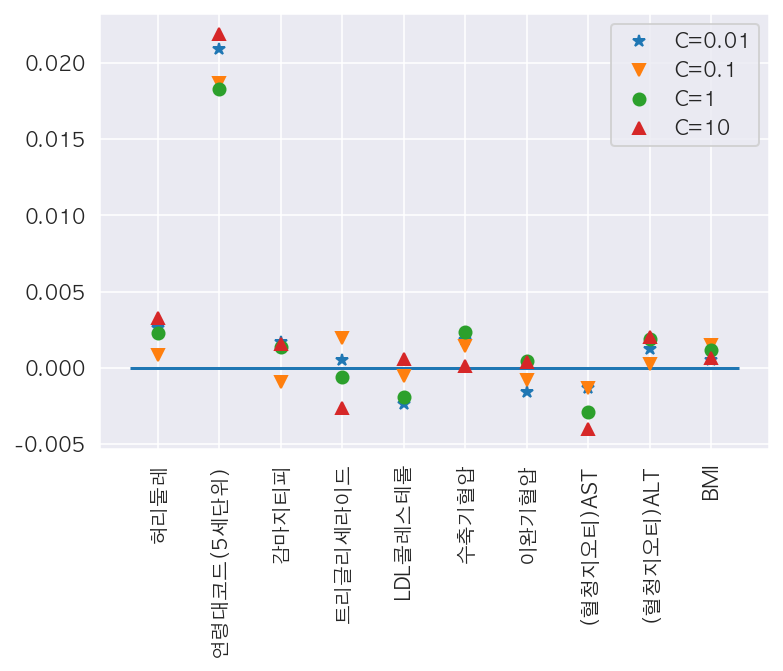

In [143]:
plt.plot(SVC001.coef_.T, '*',label="C=0.01")
plt.plot(SVC01.coef_.T, 'v',label="C=0.1")
plt.plot(SVC.coef_.T, 'o',label="C=1")
plt.plot(SVC10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [144]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(SVC001.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC001.score(X_test, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(SVC01.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC01.score(X_test, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(SVC.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC.score(X_test, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(SVC10.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC10.score(X_test, y_test)))

C001
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C01
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C1
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C10
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253


In [145]:
y_pred001 = SVC001.predict(X_test)
y_pred = SVC.predict(X_test)
y_pred01 = SVC01.predict(X_test)
y_pred10 = SVC10.predict(X_test)

In [148]:
print(metrics.confusion_matrix(y_test, y_pred001),"\n")
print(metrics.confusion_matrix(y_test, y_pred01),"\n")
print(metrics.confusion_matrix(y_test, y_pred),"\n")
print(metrics.confusion_matrix(y_test, y_pred10),"\n")

[[226703      0]
 [  9321      0]] 

[[226703      0]
 [  9321      0]] 

[[226703      0]
 [  9321      0]] 

[[226703      0]
 [  9321      0]] 



## scaling

### standard scaler

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [151]:
SVC01_scaled = LinearSVC(C=0.1).fit(x_train_scaled, y_train)

In [152]:
SVC_scaled = LinearSVC(C=1).fit(x_train_scaled, y_train)

In [153]:
SVC10_scaled = LinearSVC(C=10).fit(x_train_scaled, y_train)

In [154]:
SVC001_scaled = LinearSVC(C=0.01).fit(x_train_scaled, y_train)

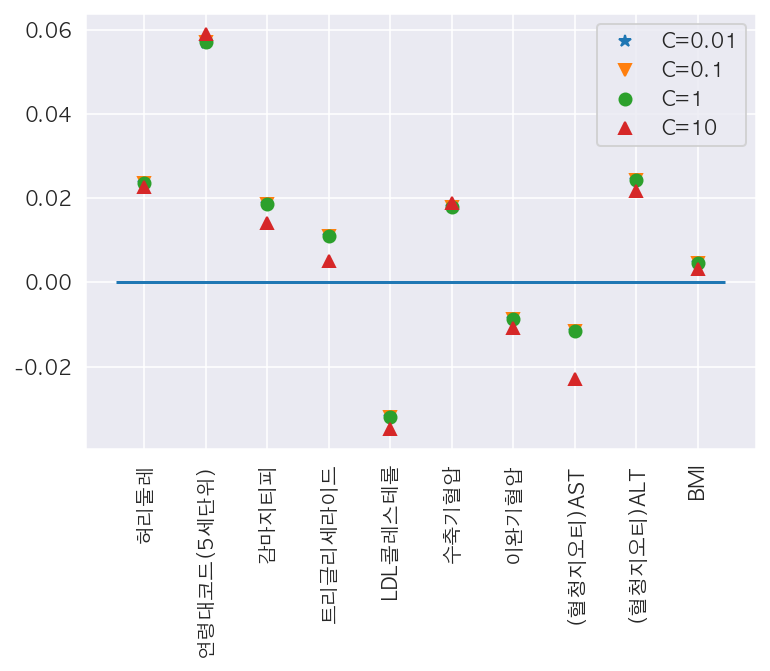

In [157]:
plt.plot(SVC001_scaled.coef_.T, '*',label="C=0.01")
plt.plot(SVC01_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(SVC_scaled.coef_.T, 'o',label="C=1")
plt.plot(SVC10_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [158]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(SVC001_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC001_scaled.score(x_test_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(SVC01_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC01_scaled.score(x_test_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(SVC_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC_scaled.score(x_test_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(SVC10_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC10_scaled.score(x_test_scaled, y_test)))

C001
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C01
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C1
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C10
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253


In [178]:
y_pred001_scaled = SVC001_scaled.predict(X_test)
y_pred01_scaled = SVC01_scaled.predict(X_test)
y_pred_scaled = SVC_scaled.predict(X_test)
y_pred10_scaled = SVC10_scaled.predict(X_test)

In [179]:
print(metrics.confusion_matrix(y_test, y_pred001_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_scaled),"\n")

[[ 27159 199544]
 [   292   9029]] 

[[ 27091 199612]
 [   292   9029]] 

[[ 27067 199636]
 [   292   9029]] 

[[114768 111935]
 [  2251   7070]] 



### Minmax scaler

In [191]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

x_train_m_scaled = scaler.transform(X_train)

x_test_m_scaled = scaler.transform(X_test)

In [163]:
SVC01_m_scaled = LinearSVC(C=1).fit(x_train_m_scaled, y_train)

In [164]:
SVC_m_scaled = LinearSVC(C=1).fit(x_train_m_scaled, y_train)

In [165]:
SVC10_m_scaled = LinearSVC(C=10).fit(x_train_m_scaled, y_train)

In [166]:
SVC001_m_scaled = LinearSVC(C=0.01).fit(x_train_m_scaled, y_train)

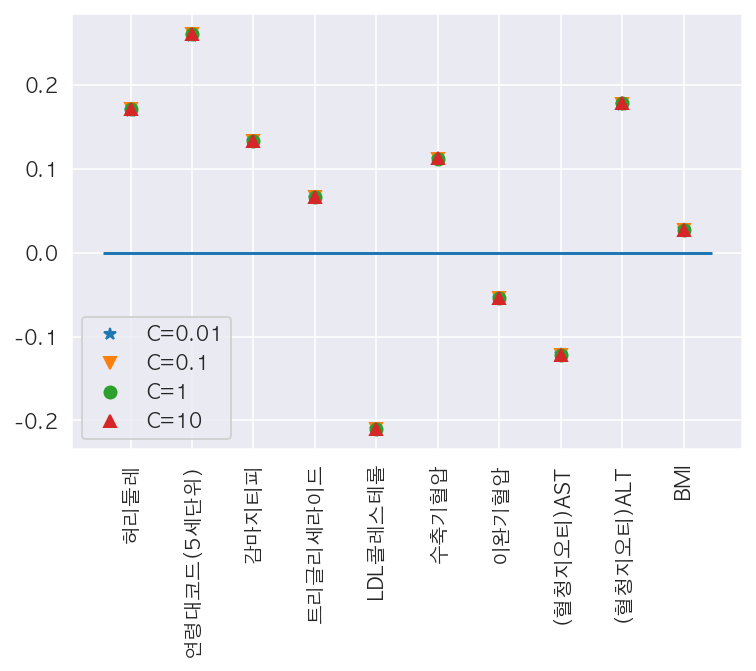

In [167]:
plt.plot(SVC001_m_scaled.coef_.T, '*',label="C=0.01")
plt.plot(SVC01_m_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(SVC_m_scaled.coef_.T, 'o',label="C=1")
plt.plot(SVC10_m_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [168]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(SVC001_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC001_m_scaled.score(x_test_m_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(SVC01_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC01_m_scaled.score(x_test_m_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(SVC_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC_m_scaled.score(x_test_m_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(SVC10_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC10_m_scaled.score(x_test_m_scaled, y_test)))

C001
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C01
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C1
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C10
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253


In [173]:
y_pred001_m_scaled = SVC001_m_scaled.predict(X_test)
y_pred01_m_scaled = SVC01_m_scaled.predict(X_test)
y_pred_m_scaled = SVC_m_scaled.predict(X_test)
y_pred10_m_scaled = SVC10_m_scaled.predict(X_test)

In [180]:
print(metrics.confusion_matrix(y_test, y_pred001_m_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_m_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_m_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_m_scaled),"\n")

[[ 12910 213793]
 [   124   9197]] 

[[ 11546 215157]
 [   103   9218]] 

[[ 11421 215282]
 [   101   9220]] 

[[ 11404 215299]
 [   100   9221]] 



허연감 필수
(트리글리세라이드, LDL콜레스테롤, 수축기혈압, 이완기혈압, 혈청지오티, BMI) 1~2개 선택

## feature 변경

In [193]:
X = data[['허리둘레','연령대코드(5세단위)','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','(혈청지오티)ALT']]
X

,허리둘레,연령대코드(5세단위),감마지티피,트리글리세라이드,LDL콜레스테롤,수축기혈압,(혈청지오티)ALT
0,90.0,8,40.0,92.0,126.0,120.0,35.0
1,89.0,7,27.0,121.0,148.0,130.0,36.0
2,91.0,9,68.0,104.0,74.0,120.0,32.0
3,91.0,11,18.0,106.0,104.0,145.0,34.0
4,80.0,11,25.0,104.0,117.0,138.0,12.0
...,...,...,...,...,...,...,...
1180115,84.0,13,78.0,85.0,140.0,160.0,12.0
1180116,77.0,8,15.0,139.0,60.0,123.0,8.0
1180117,83.0,14,23.0,122.0,148.0,146.0,15.0
1180118,84.0,14,19.0,173.0,148.0,130.0,14.0


In [194]:
y = data['당뇨여부']
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [196]:
svc01 = LinearSVC(C=0.1).fit(X_train, y_train)
svc = LinearSVC(C=1).fit(X_train, y_train)
svc001 = LinearSVC(C=0.01).fit(X_train, y_train)
svc10 = LinearSVC(C=10).fit(X_train, y_train)

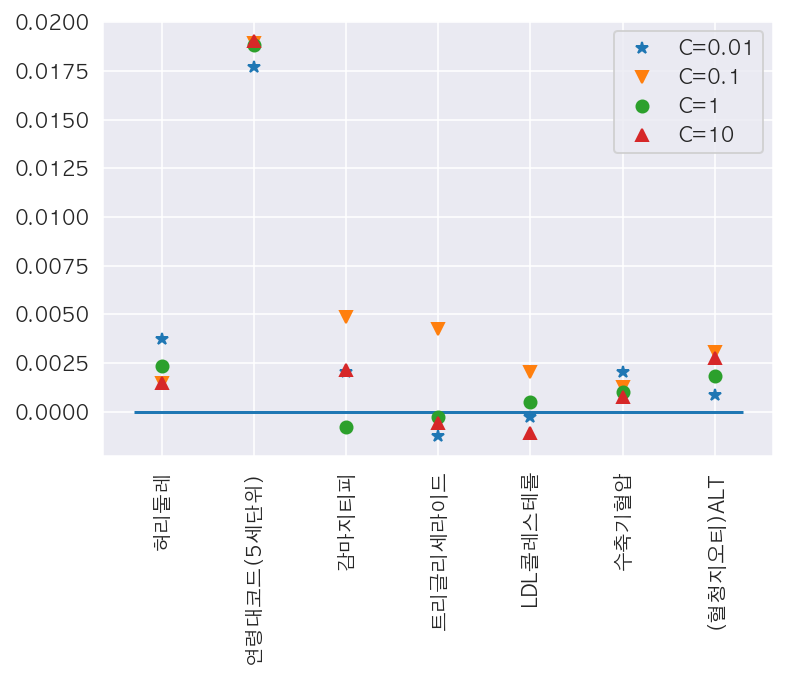

In [197]:
plt.plot(svc001.coef_.T, '*',label="C=0.01")
plt.plot(svc01.coef_.T, 'v',label="C=0.1")
plt.plot(svc.coef_.T, 'o',label="C=1")
plt.plot(svc10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [198]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001.score(X_test, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01.score(X_test, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc.score(X_test, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10.score(X_test, y_test)))

C001
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C01
TrainSet accuarcy : 0.574889630
TestSet accuarcy : 0.572971393

C1
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C10
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253


In [199]:
y_pred001 = svc001.predict(X_test)
y_pred = svc.predict(X_test)
y_pred01 = svc01.predict(X_test)
y_pred10 = svc10.predict(X_test)

In [200]:
print(metrics.confusion_matrix(y_test, y_pred001),"\n")
print(metrics.confusion_matrix(y_test, y_pred01),"\n")
print(metrics.confusion_matrix(y_test, y_pred),"\n")
print(metrics.confusion_matrix(y_test, y_pred10),"\n")

[[226703      0]
 [  9321      0]] 

[[129143  97560]
 [  3229   6092]] 

[[226703      0]
 [  9321      0]] 

[[226703      0]
 [  9321      0]] 



## scaler

### MinMax

In [201]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [202]:
svc01_scaled = LinearSVC(C=0.1).fit(X_train_scaled, y_train)
svc_scaled = LinearSVC(C=1).fit(X_train_scaled, y_train)
svc001_scaled = LinearSVC(C=0.01).fit(X_train_scaled, y_train)
svc10_scaled = LinearSVC(C=10).fit(X_train_scaled, y_train)

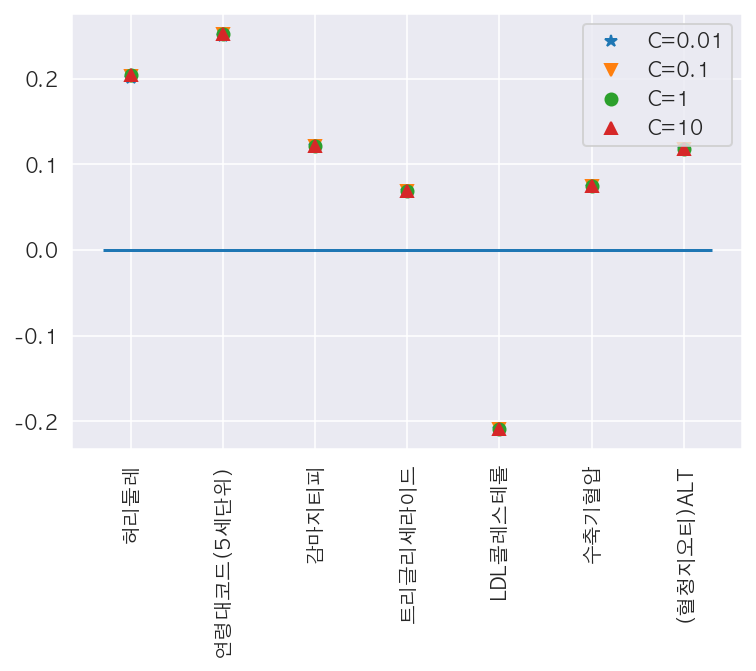

In [203]:
plt.plot(svc001_scaled.coef_.T, '*',label="C=0.01")
plt.plot(svc01_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(svc_scaled.coef_.T, 'o',label="C=1")
plt.plot(svc10_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [204]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001_scaled.score(X_test_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01_scaled.score(X_test_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc_scaled.score(X_test_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10_scaled.score(X_test_scaled, y_test)))

C001
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C01
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C1
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C10
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253


In [210]:
y_pred001_scaled = svc001_scaled.predict(X_test)
y_pred01_scaled = svc01_scaled.predict(X_test)
y_pred_scaled = svc_scaled.predict(X_test)
y_pred10_scaled = svc10_scaled.predict(X_test)

In [211]:
print(metrics.confusion_matrix(y_test, y_pred001_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_scaled),"\n")

[[  5616 221087]
 [    45   9276]] 

[[  4878 221825]
 [    37   9284]] 

[[  4810 221893]
 [    36   9285]] 

[[  4802 221901]
 [    36   9285]] 



답이 없다..

## 연령대 제거

In [5]:
X = data[['허리둘레','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST', '(혈청지오티)ALT']]
X

,허리둘레,감마지티피,트리글리세라이드,LDL콜레스테롤,수축기혈압,이완기혈압,(혈청지오티)AST,(혈청지오티)ALT
0,90.0,40.0,92.0,126.0,120.0,80.0,21.0,35.0
1,89.0,27.0,121.0,148.0,130.0,82.0,20.0,36.0
2,91.0,68.0,104.0,74.0,120.0,70.0,47.0,32.0
3,91.0,18.0,106.0,104.0,145.0,87.0,29.0,34.0
4,80.0,25.0,104.0,117.0,138.0,82.0,19.0,12.0
...,...,...,...,...,...,...,...,...
1180115,84.0,78.0,85.0,140.0,160.0,90.0,34.0,12.0
1180116,77.0,15.0,139.0,60.0,123.0,89.0,11.0,8.0
1180117,83.0,23.0,122.0,148.0,146.0,69.0,21.0,15.0
1180118,84.0,19.0,173.0,148.0,130.0,80.0,29.0,14.0


In [6]:
y = data['당뇨여부']
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [10]:
svc01 = LinearSVC(C=0.1).fit(X_train, y_train)
svc = LinearSVC(C=1).fit(X_train, y_train)
svc001 = LinearSVC(C=0.01).fit(X_train, y_train)
svc10 = LinearSVC(C=10).fit(X_train, y_train)

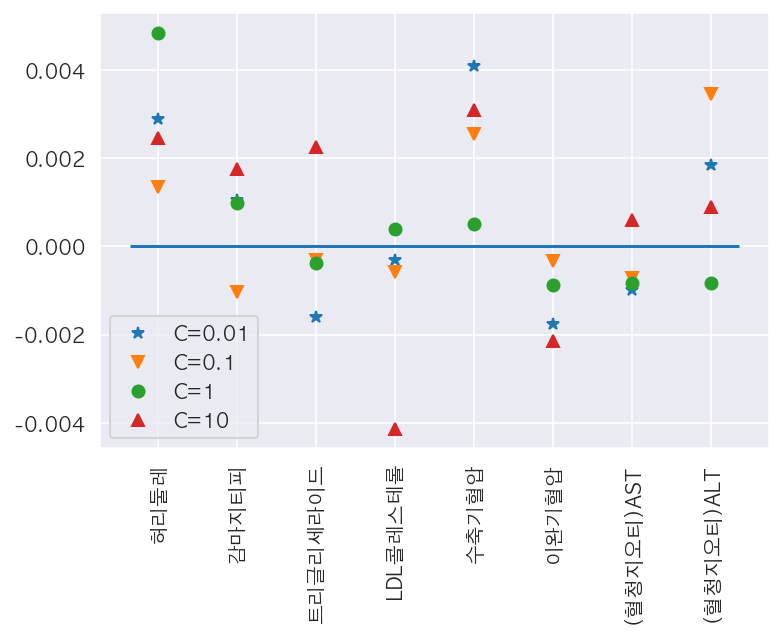

In [12]:
plt.plot(svc001.coef_.T, '*',label="C=0.01")
plt.plot(svc01.coef_.T, 'v',label="C=0.1")
plt.plot(svc.coef_.T, 'o',label="C=1")
plt.plot(svc10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [13]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001.score(X_test, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01.score(X_test, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc.score(X_test, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10.score(X_test, y_test)))

C001
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C01
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C1
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C10
TrainSet accuarcy : 0.960099397
TestSet accuarcy : 0.960249805


In [14]:
y_pred001 = svc001.predict(X_test)
y_pred = svc.predict(X_test)
y_pred01 = svc01.predict(X_test)
y_pred10 = svc10.predict(X_test)

In [15]:
print(metrics.confusion_matrix(y_test, y_pred001),"\n")
print(metrics.confusion_matrix(y_test, y_pred01),"\n")
print(metrics.confusion_matrix(y_test, y_pred),"\n")
print(metrics.confusion_matrix(y_test, y_pred10),"\n")

[[226737      0]
 [  9287      0]] 

[[226737      0]
 [  9287      0]] 

[[226737      0]
 [  9287      0]] 

[[226619    118]
 [  9264     23]] 



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [18]:
svc01_scaled = LinearSVC(C=0.1).fit(x_train_scaled, y_train)
svc_scaled = LinearSVC(C=1).fit(x_train_scaled, y_train)
svc001_scaled = LinearSVC(C=0.01).fit(x_train_scaled, y_train)
svc10_scaled = LinearSVC(C=10).fit(x_train_scaled, y_train)

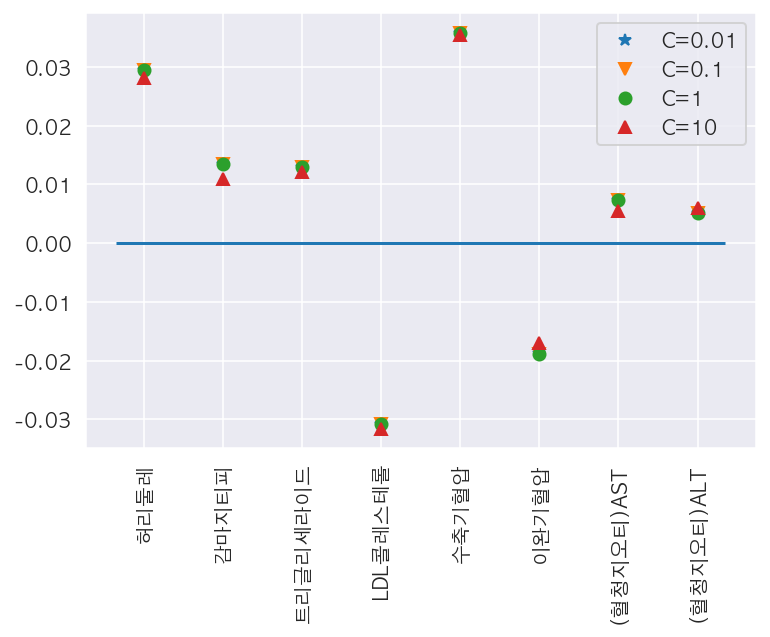

In [19]:
plt.plot(svc001_scaled.coef_.T, '*',label="C=0.01")
plt.plot(svc01_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(svc_scaled.coef_.T, 'o',label="C=1")
plt.plot(svc10_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [21]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001_scaled.score(x_test_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01_scaled.score(x_test_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc_scaled.score(x_test_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10_scaled.score(x_test_scaled, y_test)))

C001
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C01
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C1
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C10
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307


In [22]:
y_pred001_scaled = svc001_scaled.predict(X_test)
y_pred01_scaled = svc01_scaled.predict(X_test)
y_pred_scaled = svc_scaled.predict(X_test)
y_pred10_scaled = svc10_scaled.predict(X_test)

In [24]:
print(metrics.confusion_matrix(y_test, y_pred001_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_scaled),"\n")

[[  2334 224403]
 [    23   9264]] 

[[  2333 224404]
 [    23   9264]] 

[[  2333 224404]
 [    23   9264]] 

[[  4052 222685]
 [    44   9243]] 

